In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [ ]:
# import data
metrics_import = pd.read_csv('Logistic_metrics.csv', index_col=[0,1,2,3], header=0)
metrics_import.head(10)

In [ ]:
r_values = metrics_import.columns

In [ ]:
def handle_missing_data(df, replacement_value=0, nan_threshold=0.3):
    """
    Handle missing data in the dataframe by dropping rows with NaN values
    exceeding a threshold or replacing them with a specified value.

    Args:
        df (pd.DataFrame): The input dataframe.
        replacement_value (int, float): Value to replace NaNs with.
        nan_threshold (float): Maximum proportion of NaNs allowed per row;
                               rows exceeding this will be removed.

    Returns:
        pd.DataFrame: Dataframe after handling missing values.
    """
    # Calculate percentage of NaNs per row
    nan_percentage = df.isnull().mean(axis=1)

    # Print rows with NaNs and their percentage
    rows_with_nans = df[nan_percentage > 0]

    # Remove rows with NaN percentage above the threshold
    df_cleaned = df[nan_percentage <= nan_threshold]

    # Replace remaining NaNs with the replacement value
    df_cleaned = df_cleaned.fillna(replacement_value)

    return df_cleaned


In [ ]:
metrics = handle_missing_data(metrics_import, replacement_value=-1, nan_threshold=0.3)

In [ ]:
metrics.head(10)

In [ ]:
metrics_to_plot = metrics
metrics_to_plot.reset_index(inplace=True)
metrics_to_plot = metrics_to_plot.iloc[:, 3:]
metrics_to_plot.head(10)

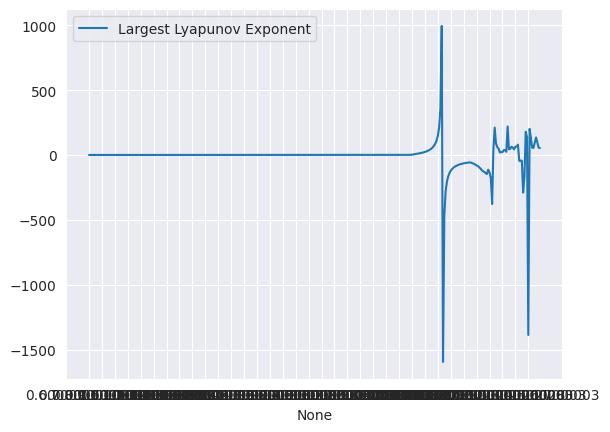

In [57]:
ax = sns.lineplot(x=r_values, y=metrics_to_plot.iloc[0, 1:].transpose().to_numpy(), label='Largest Lyapunov Exponent')
ax.set_xticks([np.round(float(tick)) for tick in ax.get_xticks()[::10]])